We will begin by importing the necessary packages:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will now construct our domain and function, single function derivative

In [14]:
x = np.arange(-3, 4, 0.01)
f_x = np.power(x,3) - 3*x**2 -9*x + 2
df_x = 3*x**2 -6*x - 9

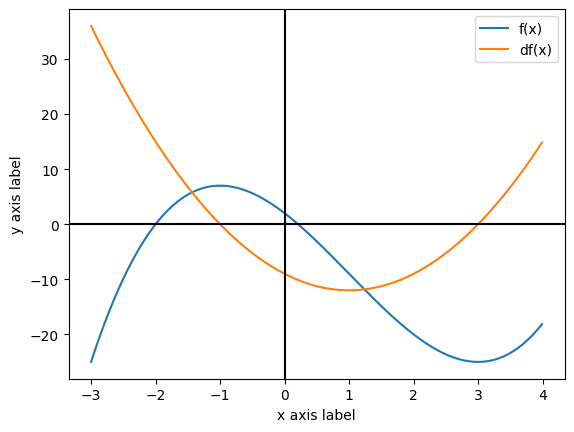

In [15]:
plt.plot(x, f_x)
plt.plot(x, df_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['f(x)', 'df(x)'])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

THE GRADIENT DESCENT METHOD:

-   The gradient descent method utilizes a learning rate ∆x, where ∆x is the product of the     value range f(x) multiplied by some scalar (learning rate) α (alpha).
-   We will continuously update the value of x as ∆x varies for all x values (x*)

This is essentially the idea of the gradient descent. We will converse to an extremum by gradually descending to it's direction.

Gradient Descent: x = x - αf'(x)

In [16]:
def gradient_descent(df, x, alpha=0.01, iterations=100, epsilon=1e-8):
    history=[x]
    for i in range(iterations):
        if abs(df(x)) < epsilon:
            print("The gradient is small enough.")
            break
        x = x - alpha*df(x)
        history.append(x)
    return history

This gradient descent function saves all updated x values during the iteration process in a python list object called 'history' and returns the object.

With the gradient descent function we will be able to estimate the lowest extremum of a function.

Suppose we want to use a function like f(x) = x^3 -  3x^2 - 9x + 2
and its derivative is a function like df(x) = 3x^2 - 6x - 9

In [17]:
df = lambda x : 3*x**2 - 6*x - 9
path = gradient_descent(df, 1., 0.01, 200)
print("value:",path[-1])

The gradient is small enough.
value: 2.999999999256501


Let's make the plot for explicit in terms of defining the process of the gradient decent method by visualizing the vector fields (i.e. representing the magnitude of the vectors at the given point)...

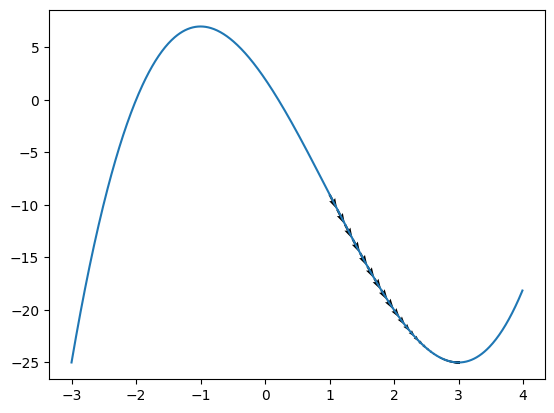

In [23]:
f = lambda x: np.power(x,3) - 3*x**2 - 9*x + 2
x = np.arange(-3,4,0.01)
y = f(x)
plt.plot(x,y)

path_x = np.asarray(path)
path_y = f(path_x)
plt.quiver(
    path_x[:-1],                  # X-coordinates of the starting points of vectors
    path_y[:-1],                  # Y-coordinates of the starting points of vectors
    path_x[1:] - path_x[:-1],     # Differences in X-coordinates for vector direction
    path_y[1:] - path_y[:-1],     # Differences in Y-coordinates for vector direction
    scale_units='xy',             # The scaling should be done in both X and Y directions
    angles='xy',                  # The angles of the vectors should be based on both X and Y directions
    scale=1,                      # Scaling factor for the length of the vectors
    color='k'                     # Color of the vectors (k = black)
)
#plt.scatter(path[-1], f(path[-1]))
plt.show()

Demonstrating the gradient descent with higher dimensions...

minima: [3.  0.5]
second minima: [[3. ]
 [0.5]]
*minima_: [3.] [0.5]


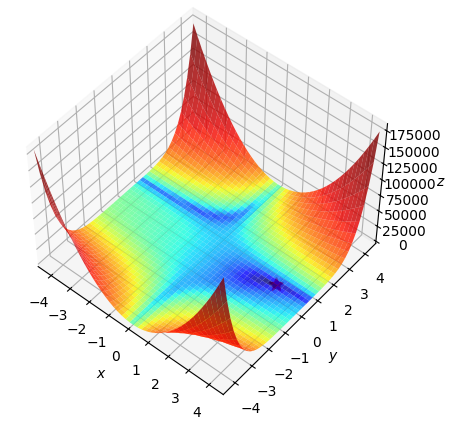

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import random

f = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

minima = np.array([3., .5])
minima_ = minima.reshape(-1,1)
print("minima:", minima)
print("second minima:", minima_)
xmin, xmax, xstep = -4.5, 4.5, 0.2
ymin, ymax, ystep = -4.5, 4.5, 0.2
x_list = np.arange(xmin, xmax + xstep, xstep)
y_list = np.arange(ymin, ymax + ystep, ystep)
x, y = np.meshgrid(x_list, y_list)
z = f(x, y)

fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(
    x,
    y,
    z,
    norm=LogNorm(),
    rstride=1,
    cstride=1,
    edgecolor='none',
    alpha=0.8,
    cmap=plt.cm.jet
)

ax.plot(*minima_, f(*minima_), 'r*', markersize=10)
print("*minima_:", *minima_)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()